# Polinomial regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

A diferencia de los modelos de predicción lineal simple, de acuerdo con las expresiones:

$$ 
    Y_i = (a + \beta X_i) + \epsilon _i
$$

onde:

- $\alpha$ = punto de corte en el eje de ordenadas

- $\beta$ = pendiente o gradiente de la recta, que son los coeficientes de regresión 

- $\epsilon _i$ corresponde al término de resíduos, que representa la diferencia entre el valor observado y el estimado para el individuo $i$.


Se puede ampliar el concepto lineal de regresión para extender el grado del modelo desde el cuadrático en adelante, generando un modelo de regresión polinomial:

$$
    Y = a + bX + cX ^ 2 + dX ^ 3...
$$

la potencialidad de este modelo es la capacidad de ajustar potencias mayores de $x$ y añadirlas al modelo, generando patrones y tipor únicos de curvaturas con respecto a la relación y/x.

Para este caso, es posible aplicar varios de los principios vistos en los problemas de regresión lineal, tales como la aplicación de los algoritmos de mínimos cuadrados y descenso del gradiente.


In [3]:
x = np.linspace(0, 10, 21)
y_1 = 4 + 2 * x - 0.1 * x ** 2
y_2 = 4 + 2 * x - 0.2 * x ** 2
y_3 = 12 - 4 * x + 0.3 * x ** 2
y_4 = 4 + 0.5 * x + 0.1 * x ** 2

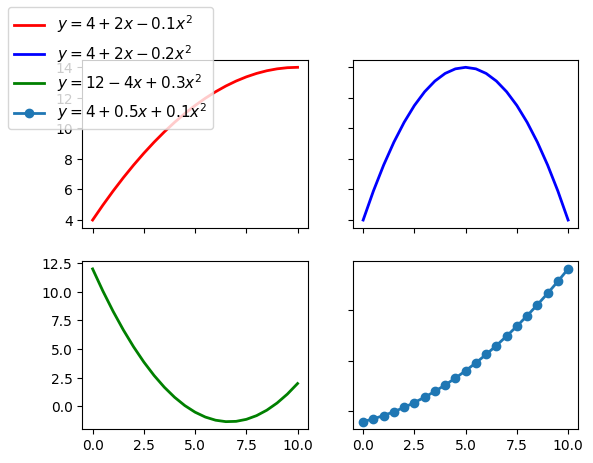

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.plot(x[:], y_1[:], "r-", linewidth = 2, label = "$y = 4 + 2x -0.1x^2$")
ax2.plot(x[:], y_2[:], "b-", linewidth = 2, label = "$y = 4 + 2x -0.2x^2$")
ax3.plot(x[:], y_3[:], "g-", linewidth = 2, label = "$y = 12 - 4x + 0.3x^2$")
ax4.plot(x[:], y_4[:], "o-", linewidth = 2, label = "$y = 4 + 0.5x +0.1x^2$")
fig.legend(loc = "upper left", fontsize = 11)

for ax in fig.get_axes():
    ax.label_outer()

Se observa que un simple modelo cuadrático con sólo tres parámetros puede describir un amplio rango de relaciones funcionales.

## Métodos empleados para solución de la regresión polinomial

### Mínimos cuadrados para regresión polinomial

Retomando la fórmula anterior que define un modelo polinómico:

$$
    Y = J(\theta) = \beta _0 + \beta _1 \theta + \beta _2 \theta ^ 2 + ... + \beta _n \theta ^ n + \epsilon
$$

y definiendo el error como

$$
    E = \frac{1}{2n} \sum_{i=1}^{m} (Y_i - (\beta _0 + \beta _1 \theta + \beta _2 \theta ^ 2 + ... + \beta _n \theta ^ n)) ^ 2
$$

Como el objetivo de este cálculo minimizar la cuenta de errores, se aplica difereniciación y simplificación con respecto a los coeficientes $\beta$:

$$
    \frac{\partial E}{\partial \theta _0} = 
        \frac{1}{2n} \sum (-2)(1)(Y_i - (\beta _0 + \beta _1 \theta + \beta _2 \theta ^ 2 + ... + \beta _n \theta ^ n))  
$$
$$
    \frac{\partial E}{\partial \theta _0} = 
        -2 \sum (Y_i - (\beta _0 + \beta _1 \theta + \beta _2 \theta ^ 2 +  ... + \beta _n \theta ^ n))
$$

Se realiza hasta obtener la diferenciación con respecto a la última constante $\beta _n$

$$
    \frac{\partial E}{\partial \theta _n} = 
        -2 \sum \theta ^n (Y_i - (\beta _0 + \beta _1 \theta + \beta _2 \theta ^ 2 + ... + \beta _n \theta ^ n))
$$


Para, entonces, encontrar el mínimo implica que su diferenciación el dicho punto será de cero, se expresión toma por tal para dar paso a una serie de ecuaciones que se resolverán por medio de métodos de álgebra lineal.
Al simplificar y distribuir para obtener un arreglo más acorde para los métodos se obtiene:

$$
    \beta _0 (m) + \beta _1 \sum \theta + \beta _2 \sum \theta ^2 + ... + \beta _n \sum \theta ^n = \sum Y_i
$$

$$
    \beta _0 \sum \theta + \beta _1 \sum \theta ^ 2 + \beta _2 \sum \theta ^ 3 + ... + \beta _n \sum \theta ^{n + 1} = \theta \sum Y_i
$$

$$
    ...
$$

$$
    \beta _0 \sum \theta ^ n + \beta _1 \sum \theta ^ {n + 1} + \beta _2 \sum \theta ^ {n + 2} + ... + \beta _n \sum \theta ^{2n} = \theta ^ n \sum Y_i
$$

Otra forma de representarlo es mediante matrices descomponiendo como resultado de una multiplicación matrivial y separando los coeficientes a encontrar:

$$
    \begin{bmatrix}
    m\beta _0 & \beta _1 \sum \theta & \beta _2 \sum \theta ^2 & ... & beta _n \sum \theta ^n \\
    \beta _0 \sum \theta & \beta _1 \sum \theta ^ 2 & \beta _2 \sum \theta ^ 3 & ... & \beta _n \sum \theta ^{n + 1} \\
    ... & ... & ... & ... & ... \\
    \beta _0 \sum \theta ^ n & \beta _1 \sum \theta ^ {n + 1} & \beta _2 \sum \theta ^ {n + 2} & ... & \beta _n \sum \theta ^{2n}
    \end{bmatrix}

    =

    \begin{bmatrix}
    \sum Y_i \\
    \theta \sum Y_i \\
    ...\\
    \theta ^ n \sum Y_i 
    \end{bmatrix}  
$$


$$
    \begin{bmatrix}
    m & \sum \theta & \sum \theta ^2 & ... & \sum \theta ^n \\
    \sum \theta & \sum \theta ^ 2 & \sum \theta ^ 3 & ... & \sum \theta ^{n + 1} \\
    ... & ... & ... & ... & ... \\
    \sum \theta ^ n & \sum \theta ^ {n + 1} & \sum \theta ^ {n + 2} & ... & \sum \theta ^{2n}
    \end{bmatrix}

    \begin{bmatrix}
    \beta _0 \\
    \beta _1 \\
    ... \\
    \beta _n 
    \end{bmatrix}

    =
    
    \begin{bmatrix}
    \sum Y_i \\
    \theta \sum Y_i \\
    ...\\
    \theta ^ n \sum Y_i 
    \end{bmatrix}  
    
$$

In [5]:
m = 150
X = 2 * np.random.rand(m, 1)
x_real = np.array([0, 0.5, 1, 1.25, 1.5, 2])
y_real = 261.88 - 7.35 * x_real + 0.083 * x_real ** 2
y = 261.88 - 7.35 * X + 0.083 * X ** 2 + 0.75 * np.random.randn(m, 1)

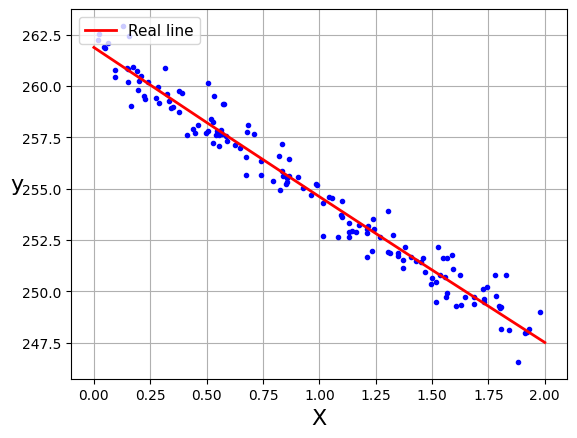

In [6]:
plt.plot(X, y, "b.")
plt.plot(x_real[:], y_real[:], "r-", linewidth = 2, label = "Real line")
plt.xlabel('X', fontsize = 16)
plt.ylabel('y', fontsize = 16, rotation = 0)
plt.legend(loc = "upper left", fontsize = 11)
plt.grid(True)
plt.show()